In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [5]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [6]:
recent_grads.shape

(173, 21)

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
recent_grads.shape

(172, 21)

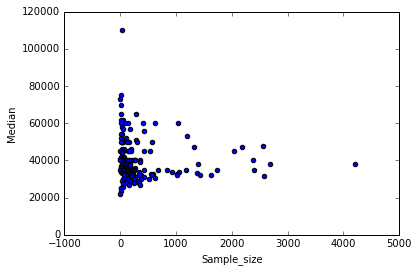

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter')

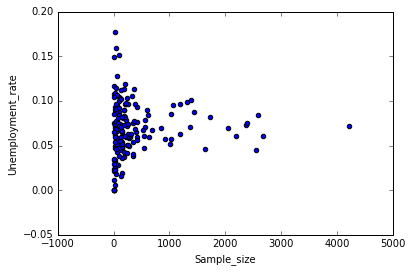

In [10]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

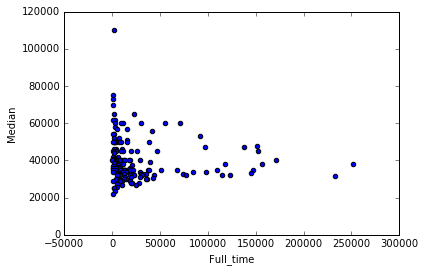

In [11]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

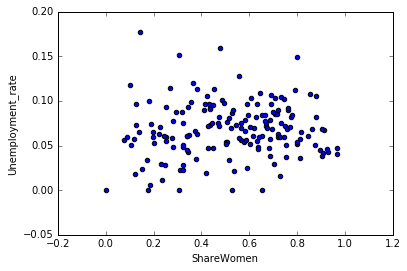

In [12]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

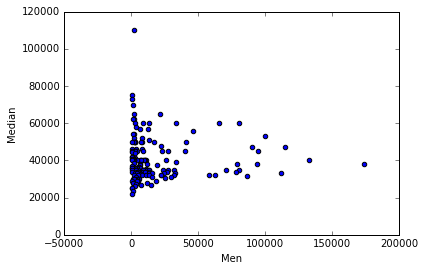

In [13]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

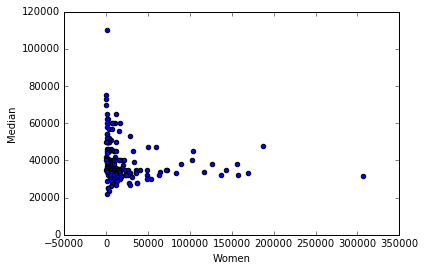

In [14]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

It appears that there is a weak upward trend between unemployment_rate and ShareWomen.
It also appears that Median salary is slightly higher the more men there are.

To answer the questions, major popularity does not appear to have an effect on median salary as the more popular majors all appear to fall in the middle of the median salaries.
Students in majority female majors make less.
There does not appear to be a trend between the number of full-time employees and median salary.

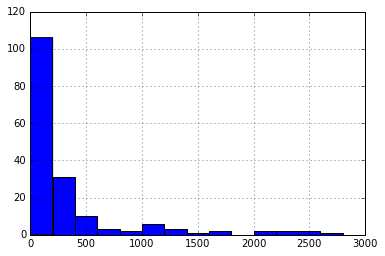

In [15]:
recent_grads['Sample_size'].hist(bins=15, range=(0,3000))

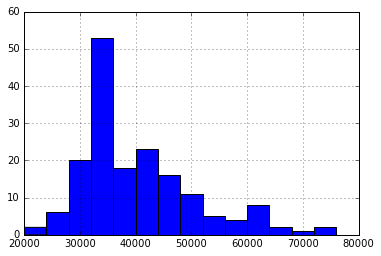

In [16]:
recent_grads['Median'].hist(bins=15, range=(20000,80000))

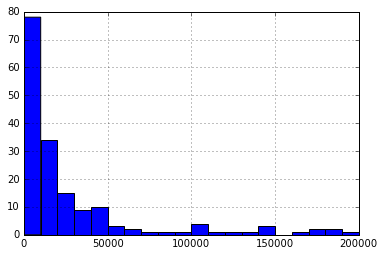

In [17]:
recent_grads['Employed'].hist(bins=20, range=(0,200000))

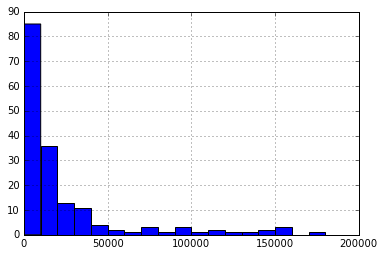

In [18]:
recent_grads['Full_time'].hist(bins=20, range=(0,200000))

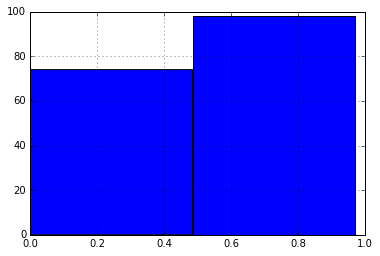

In [19]:
recent_grads['ShareWomen'].hist(bins=2)

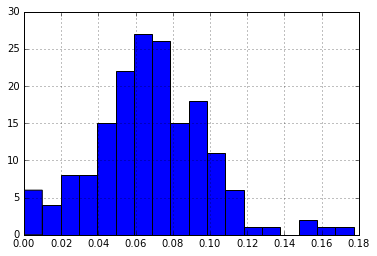

In [20]:
recent_grads['Unemployment_rate'].hist(bins=18)

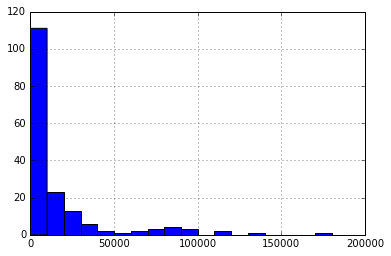

In [21]:
recent_grads['Men'].hist(bins=20,range=(0,200000))

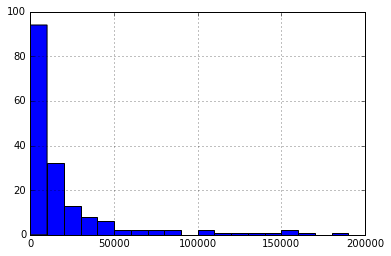

In [22]:
recent_grads['Women'].hist(bins=20,range=(0,200000))

About 40% of the majors are predominantly male.  60% are predominantly female.

The most common median salary range is 32000-36000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74b93196a0>,
      dtype=object)

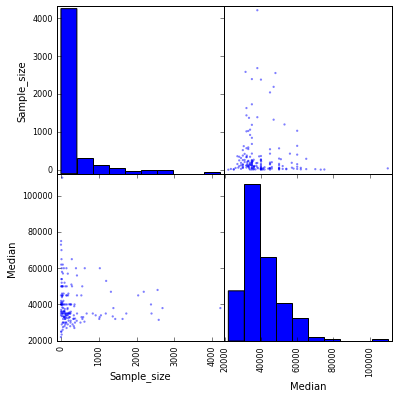

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74b9056eb8>,
      dtype=object)

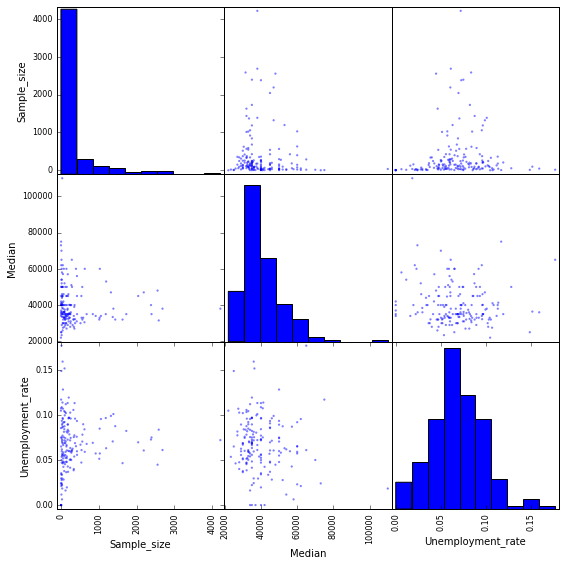

In [24]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (9,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74b8e37518>,
      dtype=object)

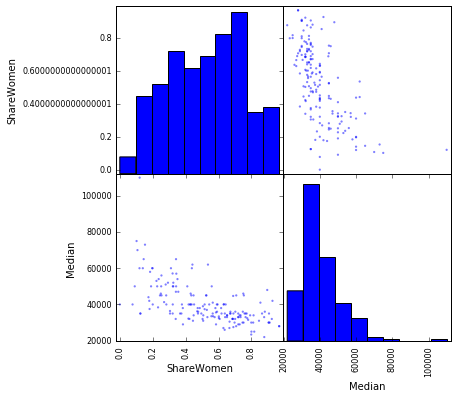

In [25]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize = (6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74b8b559b0>,
      dtype=object)

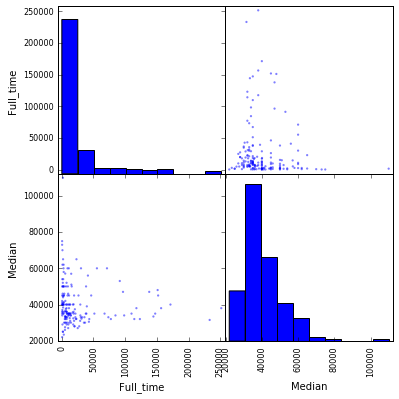

In [26]:
scatter_matrix(recent_grads[['Full_time', 'Median']], figsize = (6,6))

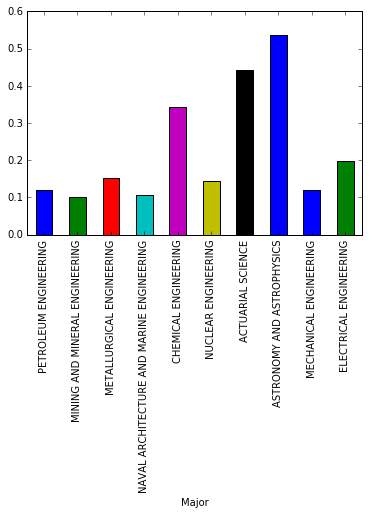

In [27]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

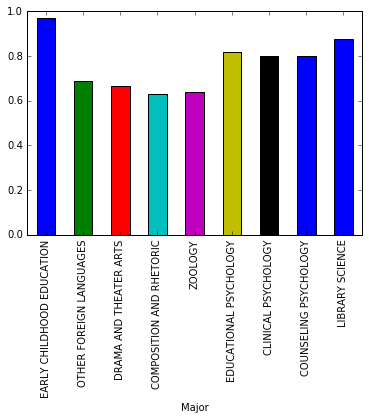

In [28]:
recent_grads[163:].plot.bar(x='Major',y='ShareWomen',legend=False)

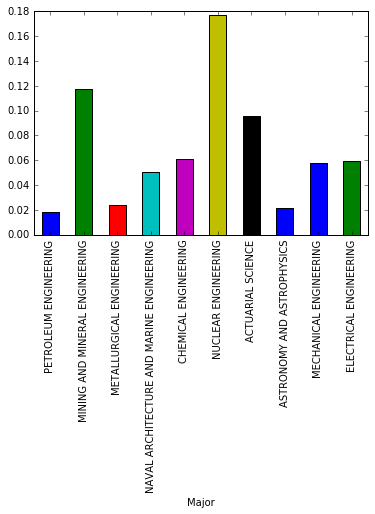

In [29]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)

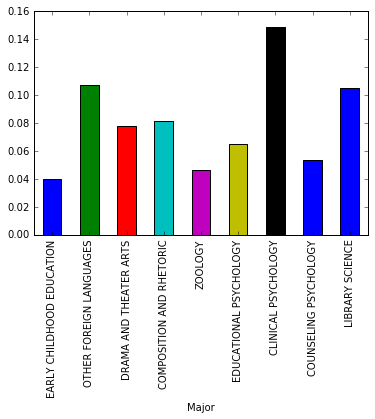

In [30]:
recent_grads[163:].plot.bar(x='Major',y='Unemployment_rate',legend=False)

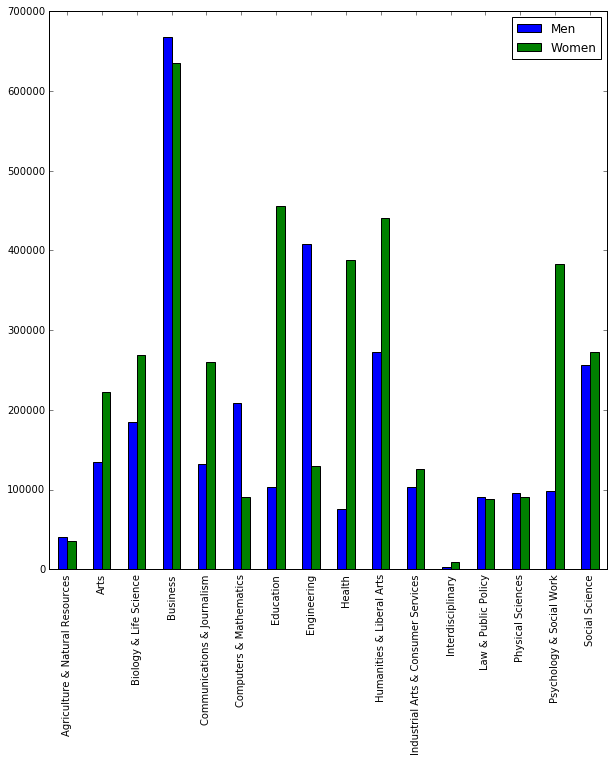

In [39]:
MenSum = {}
WomenSum = {}
categories = recent_grads['Major_category'].unique()

for category in categories:
    selected_rows = recent_grads[recent_grads['Major_category'] == category]
    MenSum[category] = selected_rows['Men'].sum()
    WomenSum[category] = selected_rows['Women'].sum()
    
MenSumSeries = pd.Series(MenSum)
WomenSumSeries = pd.Series(WomenSum)

majorCategoriesSums = pd.DataFrame(MenSumSeries, columns=['Men'])
majorCategoriesSums['Women'] = WomenSumSeries
majorCategoriesSums.plot.bar(figsize = (10,10));

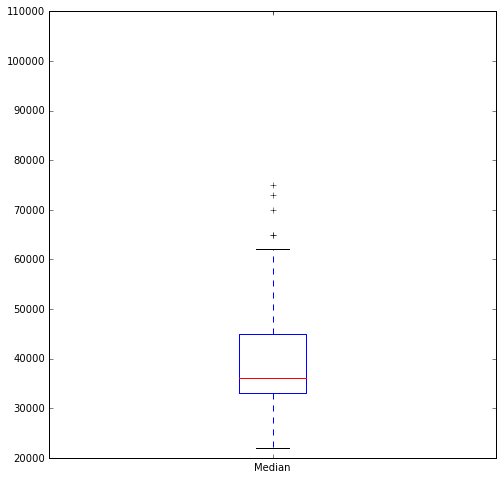

In [46]:
recent_grads['Median'].plot.box(figsize = (8,8))

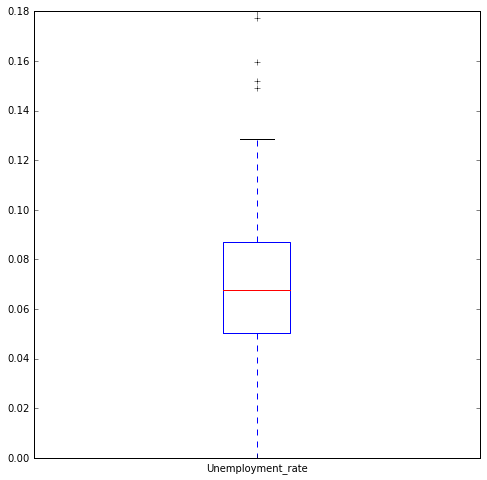

In [45]:
recent_grads['Unemployment_rate'].plot.box(figsize = (8,8))

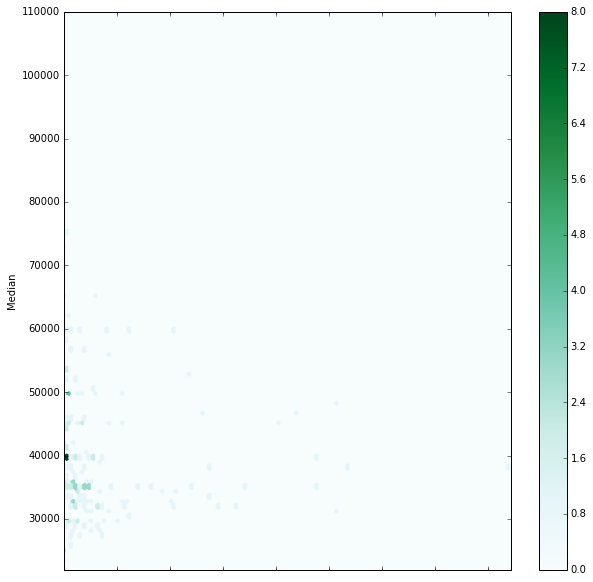

In [56]:
recent_grads.plot.hexbin(x='Sample_size',y='Median',figsize = (10,10))

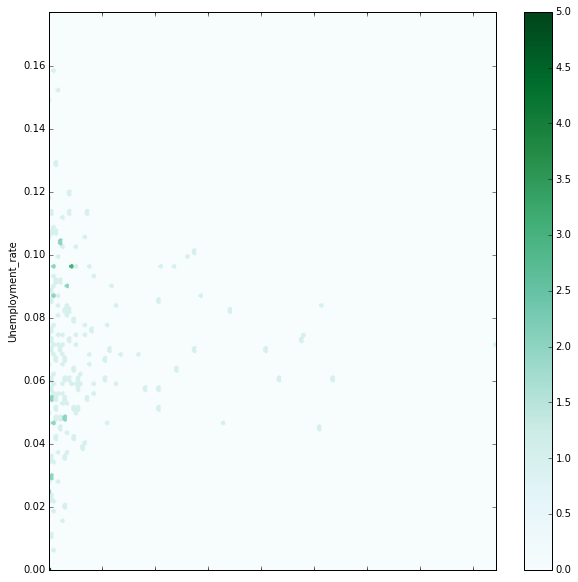

In [57]:
recent_grads.plot.hexbin(x='Sample_size',y='Unemployment_rate',figsize = (10,10))

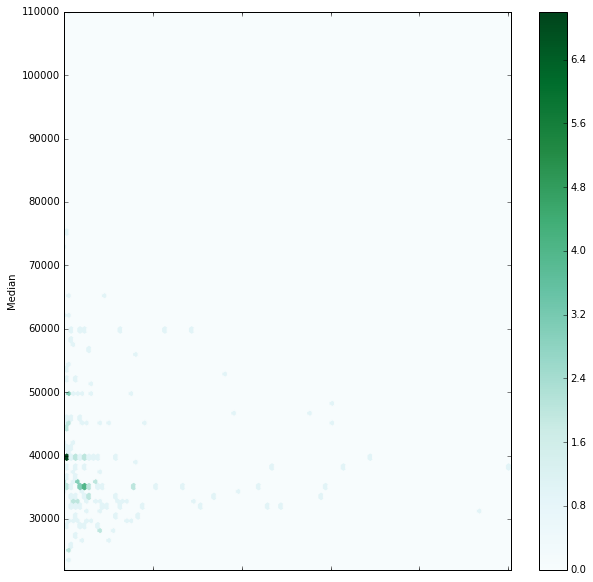

In [59]:
recent_grads.plot.hexbin(x='Full_time',y='Median',figsize = (10,10))

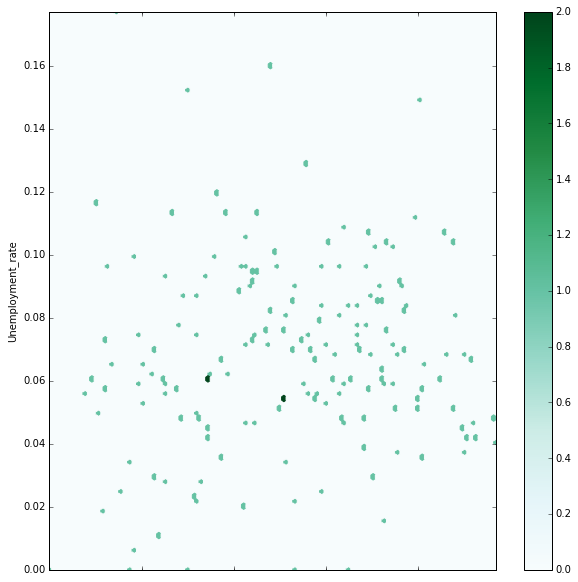

In [61]:
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate',figsize = (10,10))